### This is A Reinforcement Learning Course from Nicholas Renotte
* Github source code - https://github.com/nicknochnack/ReinforcementLearningCourse
* Stable-Baseline - https://stable-baselines3.readthedocs.io/en/master/
- the youtube main Video - https://www.youtube.com/watch?v=Mut_u40Sqz4
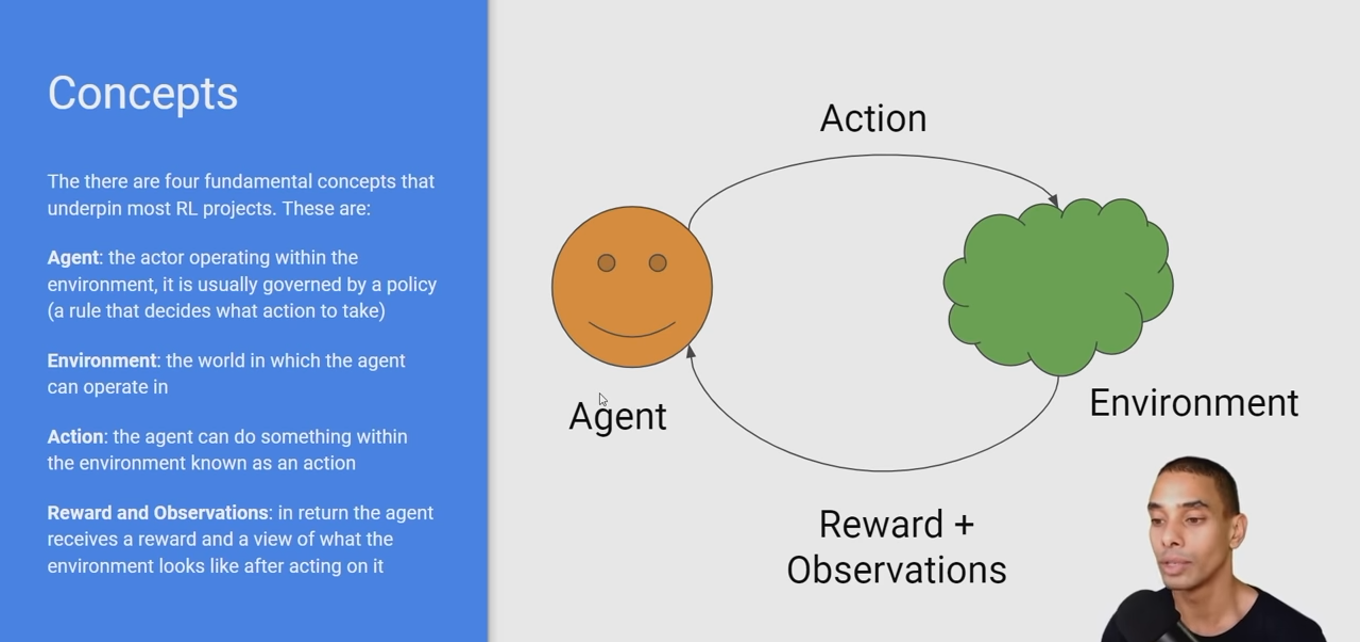
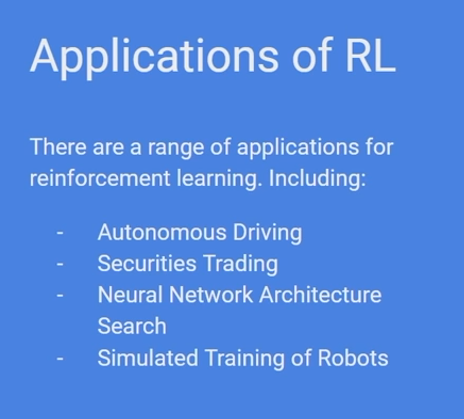 
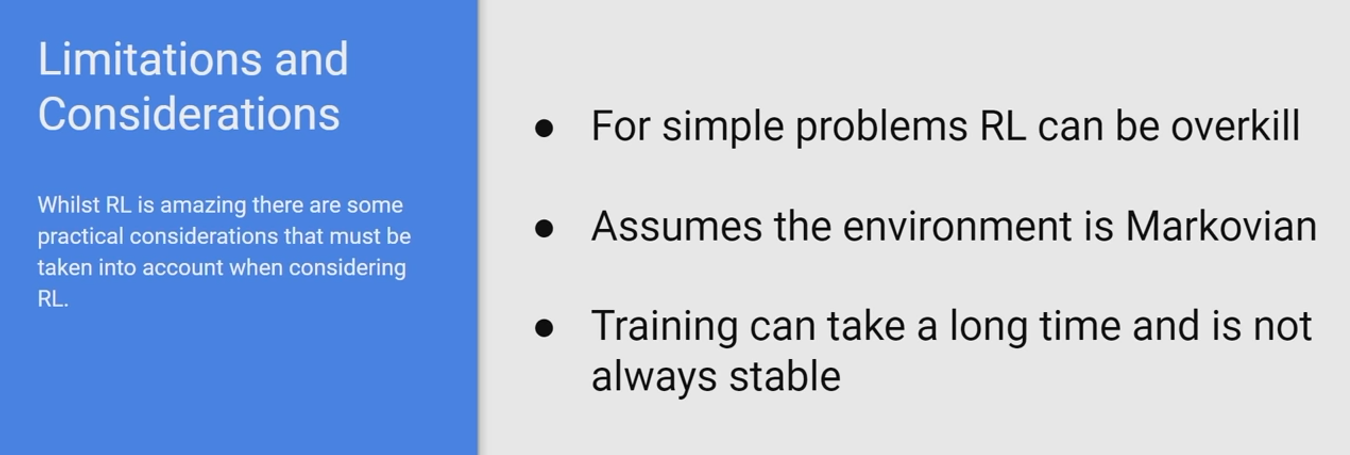
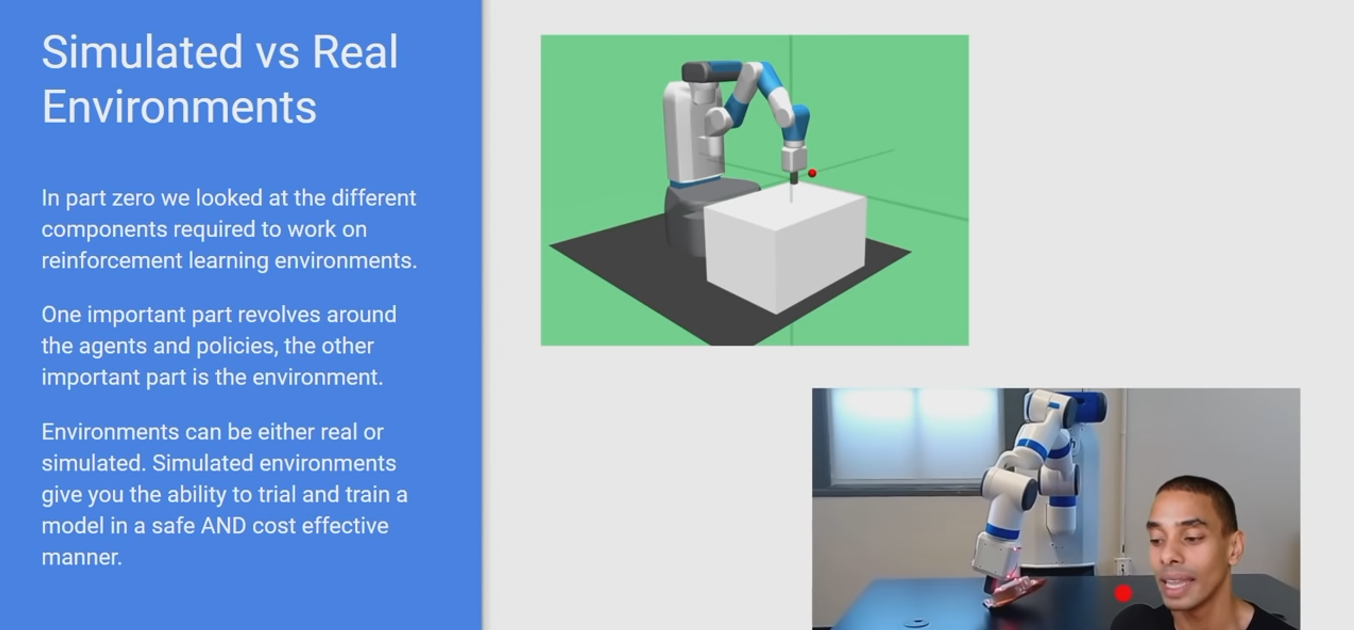
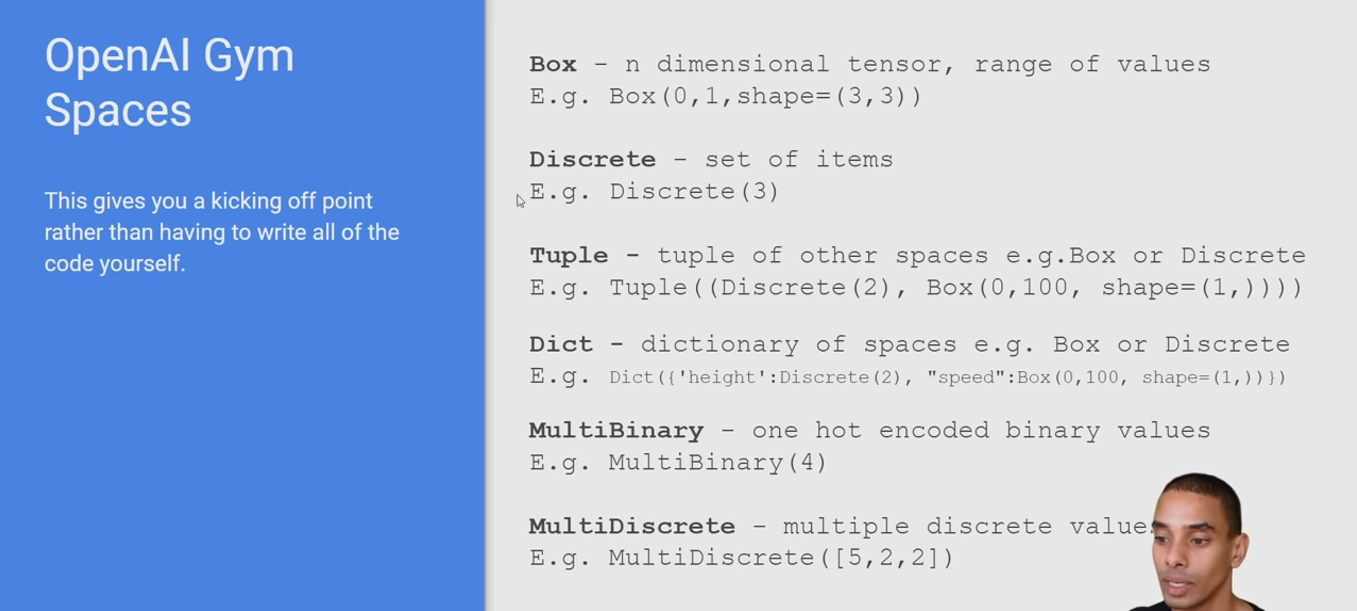
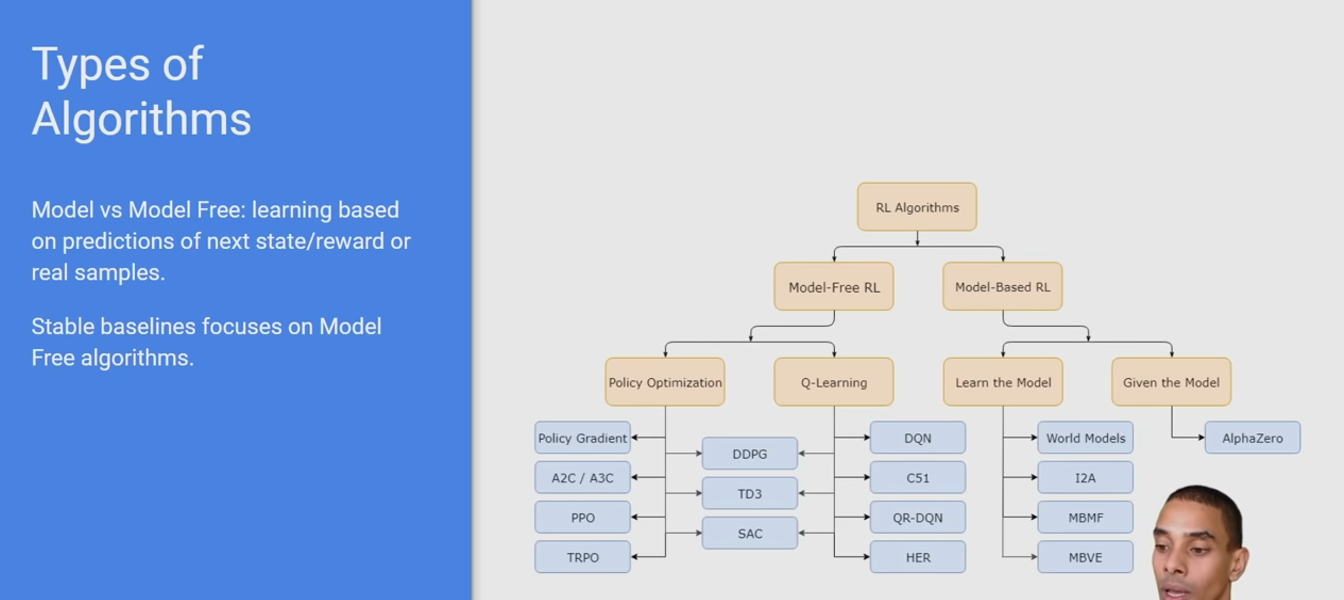
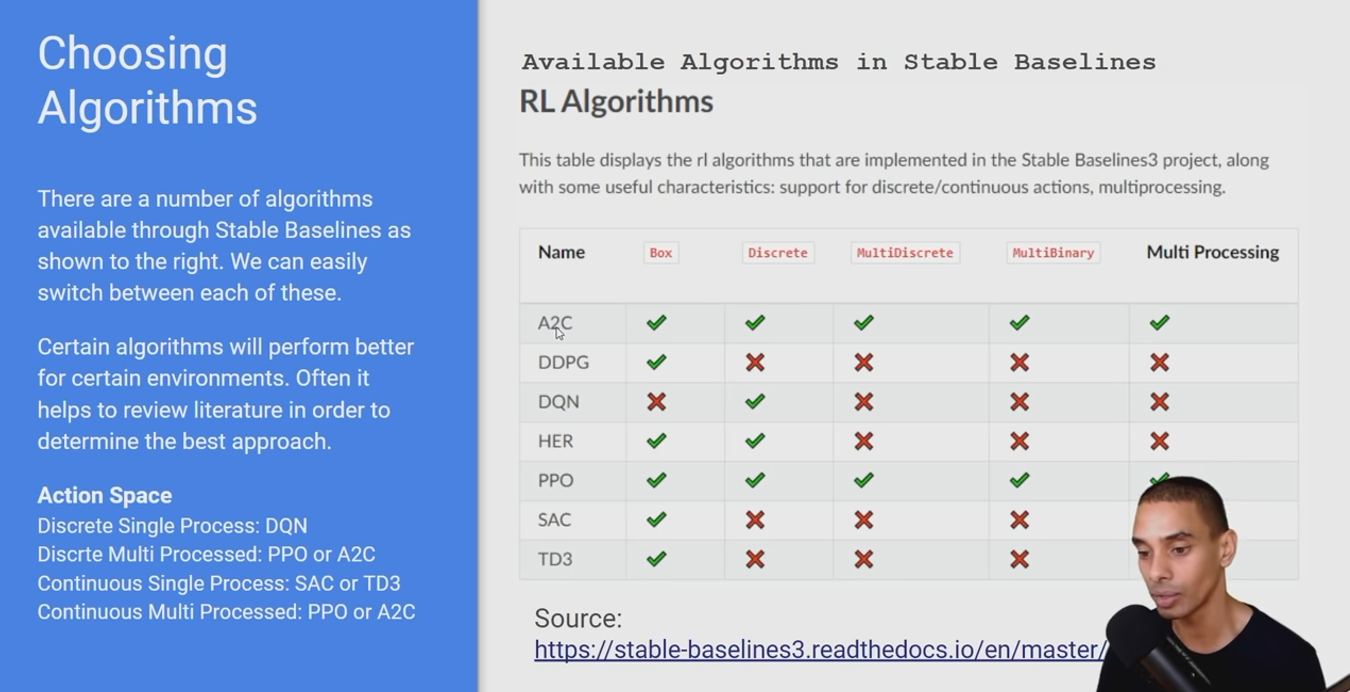
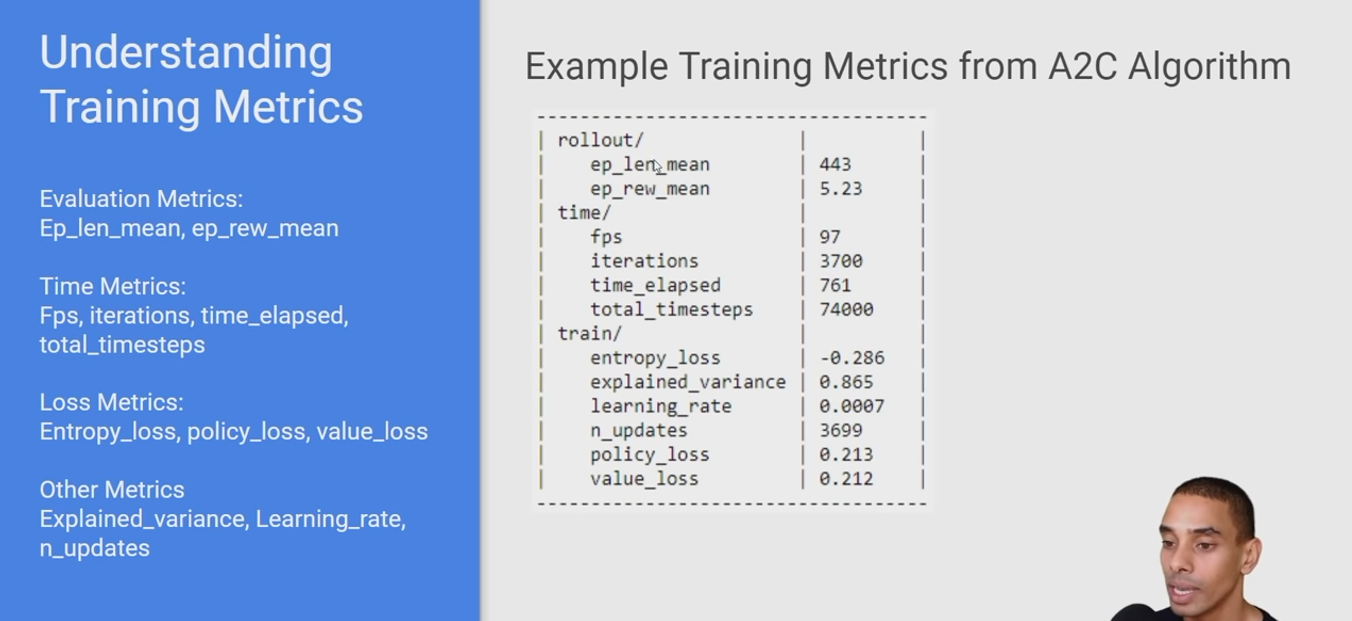
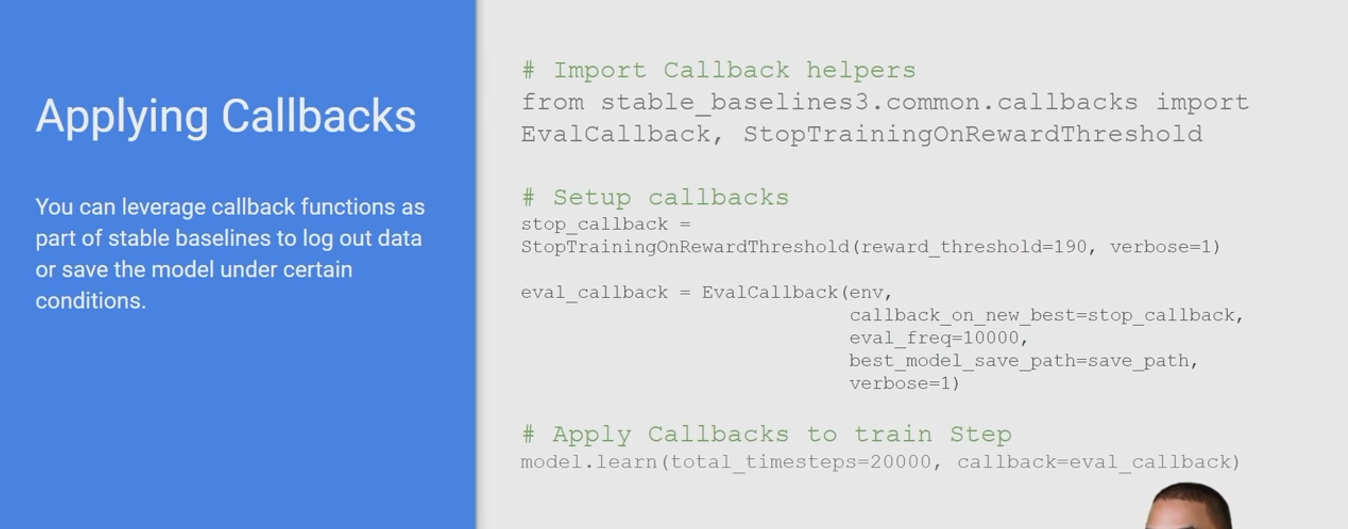
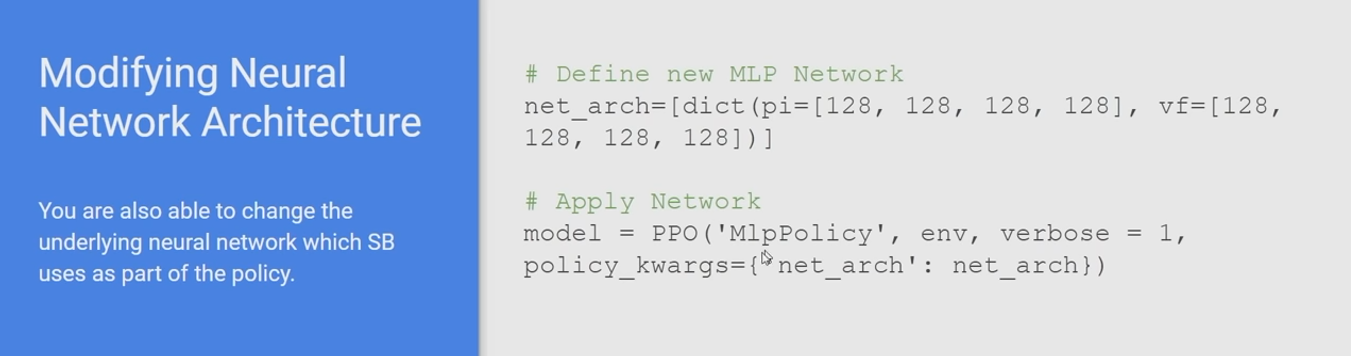
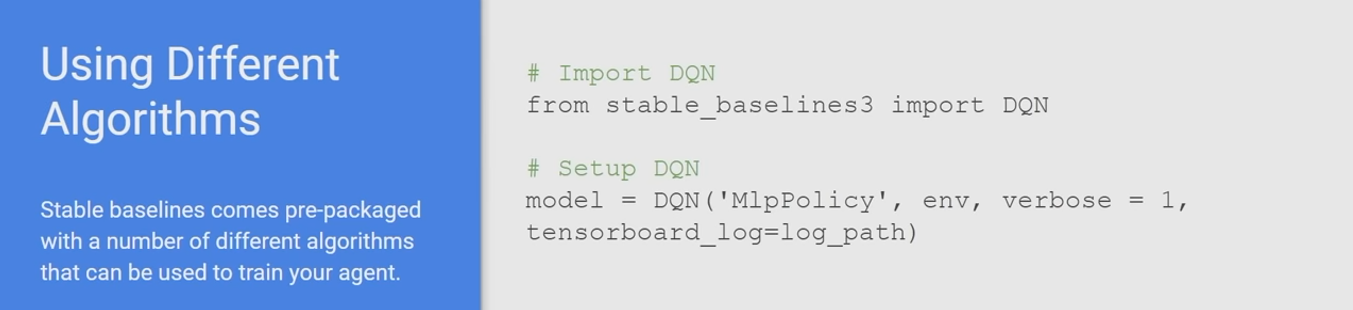

## 1. Import Dependencies

In [1]:
# !pip install stable-baselines3[extra]
# !pip install pyglet==1.5.27
# !pip install gym[all]

In [2]:
import os
import gym
import pyglet
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

## 2. Load Environment

In [3]:
environment_name = 'CartPole-v0'
env = gym.make(environment_name)

In [4]:
episodes = 100  # think of it as one episode of full game
for episode in range(1,episodes+1):
    state = env.reset()  # reset the agent , action , environment , obsevation , rewards
    
    done = False
    score = 0
    
    while not done:
        env.render()
        action = env.action_space.sample()  # return random value between (0,1)
        n_state,reward , done,info = env.step(action)
        score += reward
        
        print(f"Action: {action} ,Score: {score} >> Other Infos: n_state {n_state},Reward {reward},Done {done}")
    print(f'Episode: {episode}, Score:{score}')
env.close()

Action: 1 ,Score: 1.0 >> Other Infos: n_state [-0.02095603  0.23194182  0.04283231 -0.28241017],Reward 1.0,Done False
Action: 1 ,Score: 2.0 >> Other Infos: n_state [-0.01631719  0.42642748  0.03718411 -0.5612823 ],Reward 1.0,Done False
Action: 1 ,Score: 3.0 >> Other Infos: n_state [-0.00778864  0.6210084   0.02595847 -0.8420223 ],Reward 1.0,Done False
Action: 1 ,Score: 4.0 >> Other Infos: n_state [ 0.00463152  0.8157666   0.00911802 -1.1264302 ],Reward 1.0,Done False
Action: 1 ,Score: 5.0 >> Other Infos: n_state [ 0.02094686  1.0107679  -0.01341058 -1.4162394 ],Reward 1.0,Done False
Action: 0 ,Score: 6.0 >> Other Infos: n_state [ 0.04116221  0.81581455 -0.04173537 -1.1277783 ],Reward 1.0,Done False
Action: 1 ,Score: 7.0 >> Other Infos: n_state [ 0.05747851  1.0114577  -0.06429093 -1.433254  ],Reward 1.0,Done False
Action: 0 ,Score: 8.0 >> Other Infos: n_state [ 0.07770766  0.8171851  -0.09295601 -1.1613357 ],Reward 1.0,Done False
Action: 0 ,Score: 9.0 >> Other Infos: n_state [ 0.094051

### Understanding the Environment

In [5]:
env.action_space

Discrete(2)

In [6]:
env.action_space.sample()

0

In [7]:
env.observation_space

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

In [8]:
env.observation_space.sample()

array([-4.5478554e+00, -1.5875590e+38, -1.3526188e-01, -9.0612892e+37],
      dtype=float32)

## 3. Train An RL Model

In [9]:
# Make Directories first
log_path = os.path.join("Training","Logs")

In [10]:
env = gym.make(environment_name)
env= DummyVecEnv([lambda:env])
model = PPO('MlpPolicy',env,verbose= 1,tensorboard_log=log_path)

Using cuda device


In [11]:
model.learn(total_timesteps=200)

Logging to Training\Logs\PPO_3
-----------------------------
| time/              |      |
|    fps             | 216  |
|    iterations      | 1    |
|    time_elapsed    | 9    |
|    total_timesteps | 2048 |
-----------------------------


## 4.Save and Reload the Model

In [12]:
PPO_Path = os.path.join("Training","Saved Models","PPO_Model_Carpole")
model.save(PPO_Path)

In [13]:
del model

In [14]:
model = PPO.load(PPO_Path,env =env)

## 5. Evaluation

In [15]:
evaluate_policy(model,env,n_eval_episodes=10,render=True)

d:\Src\Anaconda\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(200.0, 0.0)

In [16]:
env.close()

In [17]:
episodes = 5  # think of it as one episode of full game
for episode in range(1,episodes+1):
    obs = env.reset()  # reset the agent , action , environment , obsevation , rewards
    
    done = False
    score = 0
    
    while not done:
        env.render()
        action ,_= model.predict(obs) # we now using model here
        obs ,reward , done,info = env.step(action)
        score += reward
        
        print(f"Action: {action} ,Score: {score} >> Other Infos: n_state {n_state},Reward {reward},Done {done}")
    print(f'Episode: {episode}, Score:{score}')
env.close()

Action: [1] ,Score: [1.] >> Other Infos: n_state [ 0.10751973  1.2019119  -0.21007629 -1.9570929 ],Reward [1.],Done [False]
Action: [1] ,Score: [2.] >> Other Infos: n_state [ 0.10751973  1.2019119  -0.21007629 -1.9570929 ],Reward [1.],Done [False]
Action: [1] ,Score: [3.] >> Other Infos: n_state [ 0.10751973  1.2019119  -0.21007629 -1.9570929 ],Reward [1.],Done [False]
Action: [1] ,Score: [4.] >> Other Infos: n_state [ 0.10751973  1.2019119  -0.21007629 -1.9570929 ],Reward [1.],Done [False]
Action: [1] ,Score: [5.] >> Other Infos: n_state [ 0.10751973  1.2019119  -0.21007629 -1.9570929 ],Reward [1.],Done [False]
Action: [0] ,Score: [6.] >> Other Infos: n_state [ 0.10751973  1.2019119  -0.21007629 -1.9570929 ],Reward [1.],Done [False]
Action: [0] ,Score: [7.] >> Other Infos: n_state [ 0.10751973  1.2019119  -0.21007629 -1.9570929 ],Reward [1.],Done [False]
Action: [1] ,Score: [8.] >> Other Infos: n_state [ 0.10751973  1.2019119  -0.21007629 -1.9570929 ],Reward [1.],Done [False]
Action: 

In [18]:
#! Based on the obervation, the model predect the perfect value for next move
obs = env.reset() # now we get the observation of our space
model.predict(obs),env.action_space.sample()

((array([1], dtype=int64), None), 0)

In [19]:
env.step(action) # State , reward , done , info

(array([[-0.04952485,  0.15530074, -0.01147814, -0.30127576]],
       dtype=float32),
 array([1.], dtype=float32),
 array([False]),
 [{}])

## 7. Viewing Logs in Tensorboard

In [20]:
training_log_path = os.path.join(log_path,'PPO_2')

In [21]:
# ! tensorboard --logdir={training_log_path}

^C


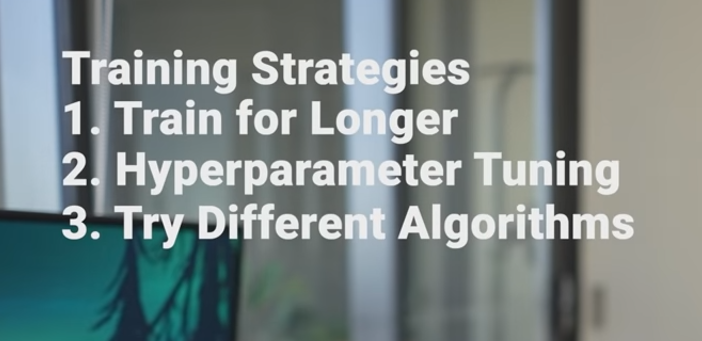

## 8. Adding callback to the taining Stage
Stop the tarining after achieving a goal

In [22]:
from stable_baselines3.common.callbacks import EvalCallback , StopTrainingOnRewardThreshold

save_path = os.path.join("Training","Saved Models")

stop_callback = StopTrainingOnRewardThreshold(reward_threshold=200,verbose=1)
eval_callback = EvalCallback(env,callback_on_new_best=stop_callback ,eval_freq= 10000 , best_model_save_path = save_path ,verbose=1 )

In [23]:
model = PPO("MlpPolicy" , env , verbose = 1 , tensorboard_log= log_path)
model.learn(total_timesteps=2000 , callback = eval_callback)

Using cuda device
Logging to Training\Logs\PPO_4
-----------------------------
| time/              |      |
|    fps             | 543  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
-----------------------------


## 9. Changing Policies

In [27]:
net_arch = [dict (pi = [128,128,128,128] , vf = [128,128,128,128] )]

model = PPO('MlpPolicy' , env , verbose= 1 ,tensorboard_log= log_path , policy_kwargs={'net_arch':net_arch})

model.learn(total_timesteps=200,callback=eval_callback)

Using cuda device
Logging to Training\Logs\PPO_5


d:\Src\Anaconda\lib\site-packages\stable_baselines3\common\policies.py:458: UserWarning: As shared layers in the mlp_extractor are deprecated and will be removed in SB3 v1.8.0, you should now pass directly a dictionary and not a list (net_arch=dict(pi=..., vf=...) instead of net_arch=[dict(pi=..., vf=...)])
  warnings.warn(


-----------------------------
| time/              |      |
|    fps             | 415  |
|    iterations      | 1    |
|    time_elapsed    | 4    |
|    total_timesteps | 2048 |
-----------------------------


## 10. Using an Alternate Algorithm

In [30]:
from stable_baselines3 import DQN

In [32]:
model = DQN('MlpPolicy' , env , verbose= 1 ,tensorboard_log= log_path)
model.learn(total_timesteps=200,callback=eval_callback)

Using cuda device
Logging to Training\Logs\DQN_2
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 3747     |
|    time_elapsed     | 0        |
|    total_timesteps  | 75       |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 3714     |
|    time_elapsed     | 0        |
|    total_timesteps  | 130      |
----------------------------------


In [33]:
# now to save, you can
# model.save()
# DQN.load()